In [3]:
!pip install tensorflow opencv-python matplotlib

You should consider upgrading via the '/home/ryan/ML/ImageClassifier/ImageClassifier/bin/python -m pip install --upgrade pip' command.


In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

I0000 00:00:1721781115.782578    5632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721781115.888368    5632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721781115.888402    5632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [6]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
import cv2
import imghdr

In [9]:
data_dir = 'data'

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
image_exts[2]

'bmp'

In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/sad/sad-person-pictures-1920-x-1200-qq00l14kkjed5hew.jpg
Image not in ext list data/sad/sad-person-pictures-1920-x-1270-5jatnx06kaizb3sc.jpg
Image not in ext list data/sad/image98.jpg
Image not in ext list data/sad/depositphotos_36254119-stock-photo-desperate-sad-people.jpg
Image not in ext list data/sad/sad-people-are-standing-rooftop-092116870_prevstill.jpeg
Image not in ext list data/sad/depressed-senior-man-looking-unhappy-260nw-1326693131.jpg
Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg
Image not in ext list data/sad/sad-young-woman-feeling-stressed-footage-107160392_iconl.jpeg
Image not in ext list data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image not in ext list data/happy/Happy20People.jpg
Image not in ext list data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list 

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 173 files belonging to 2 classes.


I0000 00:00:1721782231.315956    5632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721782231.316032    5632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721782231.316046    5632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721782231.458144    5632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1721782231.458183    5632 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-23

In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

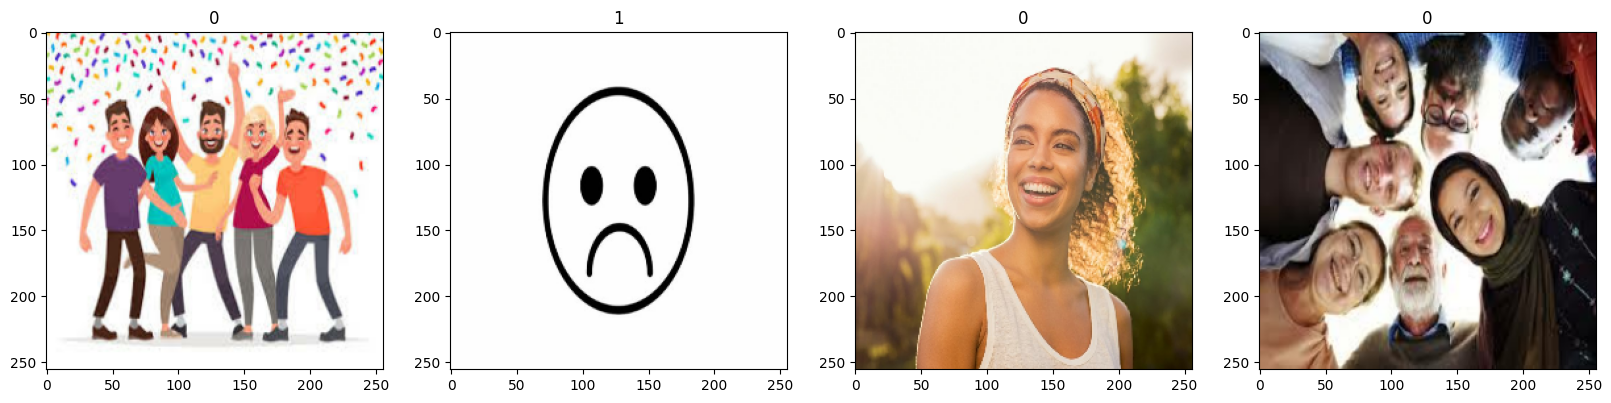

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
data = data.map(lambda x,y: (x/255,y))

In [25]:
data.as_numpy_iterator().next()[0].max()

1.0

In [36]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [37]:
test_size

1

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [39]:
len(test)

1

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [54]:
model = Sequential()

In [55]:
model.add(Input(shape=(256,256,3)))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
logdir = 'logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


I0000 00:00:1721783462.930074   14682 service.cc:146] XLA service 0x7fd848004e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721783462.930129   14682 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-23 18:11:02.964329: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-23 18:11:03.114631: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5052 - loss: 1.1812

I0000 00:00:1721783466.607408   14682 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.5010 - loss: 1.2325 - val_accuracy: 0.5625 - val_loss: 0.6679
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4958 - loss: 0.7101 - val_accuracy: 0.5312 - val_loss: 0.6347
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5698 - loss: 0.6147 - val_accuracy: 0.7812 - val_loss: 0.5396
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8062 - loss: 0.5196 - val_accuracy: 0.6250 - val_loss: 0.5291
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7344 - loss: 0.4928 - val_accuracy: 0.7812 - val_loss: 0.5194
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8146 - loss: 0.4194 - val_accuracy: 0.9375 - val_loss: 0.2966
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8823 - loss: 0.3301 - val_accuracy: 0.9062 - val_loss: 0.2928
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9187 - loss: 0.2672 - val_accuracy: 1.0000 - val_loss: 0.1649
Epoch 9/20

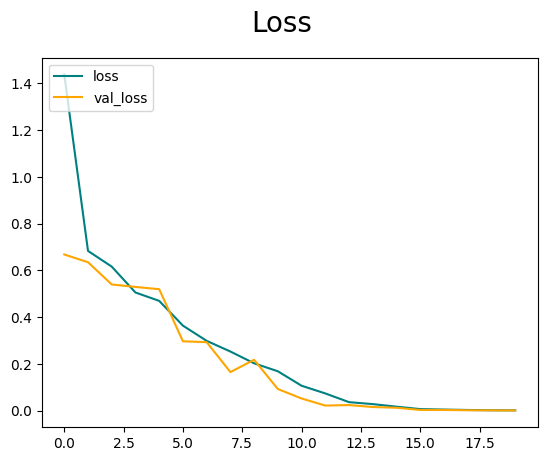

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color = "orange", label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [62]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [63]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [64]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step


2024-07-23 18:16:01.878599: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [65]:
print(f'Precision {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision 1.0, Recall: 1.0, Accuracy:1.0


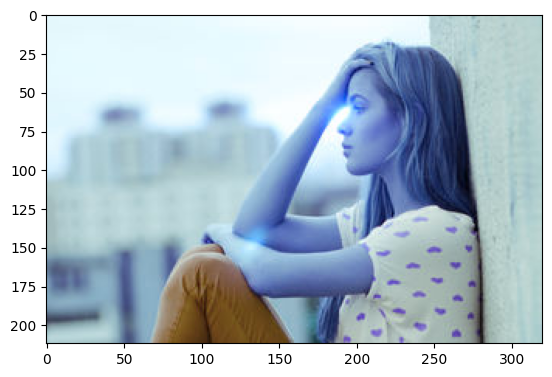

In [66]:
img = cv2.imread('shutterstock_114300748.jpg')
plt.imshow(img)
plt.show()

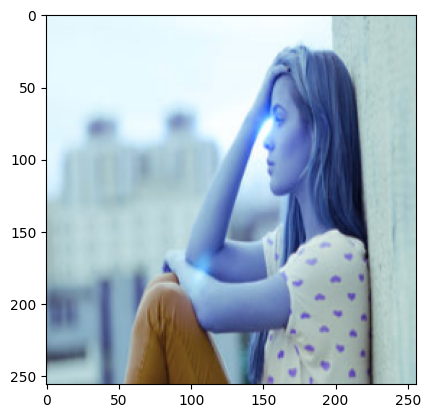

In [68]:
resize = tf.image.resize(img,(256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


In [70]:
yhat

array([[0.8537391]], dtype=float32)

In [71]:
from tensorflow.keras.models import load_model

In [73]:
model.save(os.path.join('models', 'happysadmodel.keras'))

In [74]:
new_model = load_model(os.path.join('models', 'happysadmodel.keras'))

/home/ryan/miniconda3/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [76]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[0.8537391]], dtype=float32)